<a href="https://colab.research.google.com/github/sanu1230/Spark_Task/blob/master/Task_4_To_Explore_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# To Explore Decision Tree

# Iris Data Prediction with Decision Tree

In [27]:
# Importing libraries in Python
import sklearn.datasets as datasets
import pandas as pd                                       # Pandas package for reading csv files
import numpy as np                                            # Numpy package for computing
import matplotlib.pyplot as plt                               # Visualization package
%matplotlib inline
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



In [18]:
# Loading the iris dataset

df_iris = datasets.load_iris()

# Forming the dataframe
X = pd.DataFrame(df_iris.data, columns=df_iris.feature_names)
X.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [61]:
y = df_iris.target
y = pd.DataFrame(y, columns=['Species'])
y.head()

,Species
0,0
1,0
2,0
3,0
4,0


In [68]:
# Replacing y.values with target_names

for i in y:
  if any(y[i]==0):
    y[i] = y[i].replace(0, df_iris.target_names[0])
  elif any(y[i]==1):
    y[i] = y[i].replace(1, df_iris.target_names[1])
  elif any(y[i]==2):
    y[i] = y[i].replace(2, df_iris.target_names[2])

y.head()

,Species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


# Normalizing the data

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# Creating Dataframe of X_norm
X = pd.DataFrame(data=X_norm, index=X.index , columns=X.columns)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


# Splitting Data into Train and Test

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(105, 4)
(105, 1)
(45, 4)
(45, 1)


# *Decision Tree Classifier* 

In [71]:
# Analyzing with Decision Tree Algo
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# *Decision Tree Vislualization*

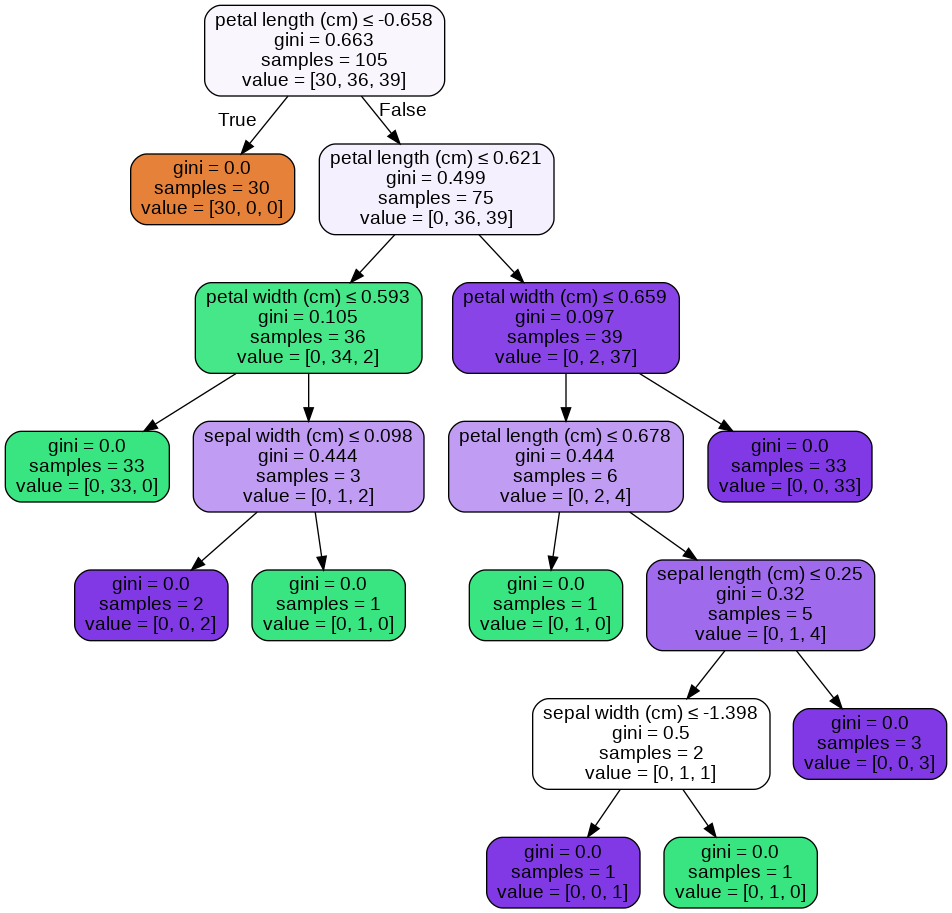

In [72]:
# Visualize the graph
dot_data = StringIO()

export_graphviz(dt, out_file=dot_data, feature_names=df_iris.feature_names,  
                filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

# Prediction

In [73]:
y_pred = dt.predict(X_test)
y_pred

array(['setosa', 'virginica', 'setosa', 'versicolor', 'virginica',
       'virginica', 'virginica', 'setosa', 'virginica', 'setosa',
       'versicolor', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'virginica', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'virginica', 'virginica', 'versicolor', 'setosa', 'setosa',
       'setosa', 'versicolor', 'virginica', 'setosa', 'virginica',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'setosa', 'setosa', 'setosa'], dtype=object)

# Evaluation

In [74]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


def model_train(model, name):
    model.fit(X_train, y_train)                                               # Fitting the model
    y_pred = model.predict(X_test)                                            # Making prediction from the trained model
    print(name + " Report")
    print('')
    cm = confusion_matrix(y_test, y_pred)
    print(name +" Confusion Matrix " +"Report")
    print('')                     # Displaying the Confusion Matrix
    print(cm)
    print('-----------------------')
    cr = classification_report(y_test, y_pred)
    print(name +" Classification Report " +" Report")
    print('')
    print(cr)                                                                 # Displaying the Classification Report
    print('------------------------')

In [75]:
model_train(dt, "Decision Tree Classifier")

Decision Tree Classifier Report

Decision Tree Classifier Confusion Matrix Report

[[20  0  0]
 [ 0 12  2]
 [ 0  0 11]]
-----------------------
Decision Tree Classifier Classification Report  Report

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        20
  versicolor       1.00      0.86      0.92        14
   virginica       0.85      1.00      0.92        11

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

------------------------


# Model Explaination

###SHAP

Let's see how the columns impact a single record of data

In [76]:
dt_model= dt.fit(X_train, y_train)

row_to_show = 10                # The row for which we want to check the SHAP explanations
data_to_predict = X_test.iloc[row_to_show]
#data_to_predict

data_to_preddict_array = data_to_predict.values.reshape(1,-1)
dt_model.predict_proba(data_to_preddict_array)    # Prediction probability on the row of the data

dt_model.predict(data_to_preddict_array)         # Predicted output

array(['versicolor'], dtype=object)

In [78]:
y_test.iloc[row_to_show]

Species    versicolor
Name: 66, dtype: object

**Prediction is correct**

In [45]:
!pip -q install shap

     |████████████████████████████████| 327kB 4.1MB/s 


In [79]:
import shap

# Object that can calculate Shap values
explainer = shap.TreeExplainer(dt_model, X_test)        # SHAP Tree Explainer

# Calculate the shap values
shap_values = explainer.shap_values(data_to_predict)      # SHAP explanations

In [80]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_to_predict)